In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import seaborn as sns

In [2]:
site_1 = pd.read_pickle("utilization_data_site1.pkl")
site_2 = pd.read_pickle("utilization_data_site2.pkl")

In [3]:
site_1

,hour,weekday,month,holiday,utilization,temperature,precipitation
0,13,0,10,True,0.076923,13.0,0.0
1,14,0,10,True,0.365385,14.0,0.0
2,15,0,10,True,0.365385,17.0,0.0
3,16,0,10,True,0.365385,18.0,0.0
4,17,0,10,True,0.365385,20.0,0.0
...,...,...,...,...,...,...,...
12966,19,1,3,True,0.057692,23.0,0.0
12967,20,1,3,True,0.057692,24.0,0.0
12968,21,1,3,True,0.057692,25.0,0.0
12969,22,1,3,True,0.057692,24.0,0.0


In [4]:
site_1_X = site_1.drop(columns = "utilization")
site_1_y = site_1['utilization']
site_2_X = site_2.drop(columns = 'utilization')
site_2_y = site_2['utilization']

In [5]:
# Split data into train, test, validation 60/20/20
site_1_X_train, site_1_X_test, site_1_y_train, site_1_y_test = train_test_split(site_1_X, site_1_y, test_size= 0.4, random_state=42)
site_2_X_train, site_2_X_test, site_2_y_train, site_2_y_test = train_test_split(site_2_X, site_2_y, test_size= 0.4, random_state=42)

site_1_X_test, site_1_X_val, site_1_y_test, site_1_y_val = train_test_split(site_1_X_test, site_1_y_test, test_size=0.5, random_state=42)
site_2_X_test, site_2_X_val, site_2_y_test, site_2_y_val = train_test_split(site_2_X_test, site_2_y_test, test_size=0.5, random_state=42)

In [6]:
# Scale data using MinMaxScaler from sklearn
site_1_scaler = MinMaxScaler()
site_2_scaler = MinMaxScaler()

site_1_scaler.fit(site_1_X_train)
site_2_scaler.fit(site_2_X_train)

site_1_X_train = site_1_scaler.fit_transform(site_1_X_train)
site_1_X_test  = site_1_scaler.transform(site_1_X_test)
site_1_X_val  = site_1_scaler.transform(site_1_X_val)


site_2_X_train = site_2_scaler.fit_transform(site_2_X_train)
site_2_X_test  = site_2_scaler.transform(site_2_X_test)
site_2_X_val  = site_2_scaler.transform(site_2_X_val)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mse,
              optimizer = "adam",
              metrics = ["mae"])
history = model.fit(site_1_X_train, site_1_y_train, epochs = 100)



Epoch 1/100


244/244 [==============================] - 1s 703us/step - loss: 0.0604 - mae: 0.1694
Epoch 2/100
244/244 [==============================] - 0s 646us/step - loss: 0.0390 - mae: 0.1222
Epoch 3/100
244/244 [==============================] - 0s 665us/step - loss: 0.0283 - mae: 0.0983
Epoch 4/100
244/244 [==============================] - 0s 652us/step - loss: 0.0231 - mae: 0.0851
Epoch 5/100
244/244 [==============================] - 0s 630us/step - loss: 0.0222 - mae: 0.0816
Epoch 6/100
244/244 [==============================] - 0s 631us/step - loss: 0.0210 - mae: 0.0774
Epoch 7/100
244/244 [==============================] - 0s 646us/step - loss: 0.0206 - mae: 0.0765
Epoch 8/100
244/244 [==============================] - 0s 652us/step - loss: 0.0205 - mae: 0.0752
Epoch 9/100
244/244 [==============================] - 0s 650us/step - loss: 0.0201 - mae: 0.0736
Epoch 10/100
244/244 [==============================] - 0s 640us/step - loss: 0.0195 - mae: 0.0726
Epoch 11/100
24

<Axes: >

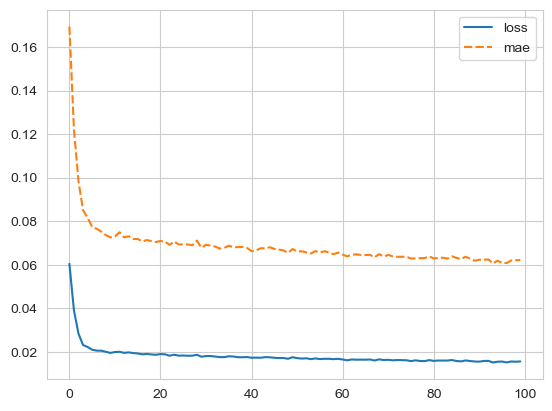

In [11]:
sns.lineplot(history.history)